# Mentoria: Monitoreo de Espacios Verdes

__DIPLODATOS 2022 - FAMAF UNC__

_Felix Rojo Lapalma_

## Aprendizaje Supervisado

En esta etapa ya hemos avanzado en

- [TP-Analisis-Visualizacion](https://github.com/felixlapalma/monitoreo-espacios-verdes-diplo202X/blob/main/notebooks-tp/Analisis-y-Visualizacion-MEV-TP.ipynb):

  - análisis y exploración del conjunto de datos (aunque sea superficialmente)
  - set representativo: Es decir, aprendimos que podemos llegar a trabajar con un set mas reducido (de las caracteristicas - columnas del dataframe) e igualmente vamos a estar representando gran parte del conjunto.
  - inputacion de valores:   
    - tenemos formas de inputar valores en rangos temporales que no tenemos (para una cierta zona) utilizando otros rangos temporales (aqui aprovechamos fuertemente la estacionalidad de lo que estamos monitoreando)
    - que un outlier en un rango temporal puede ser un valor nominal en otro rango temporal.
  - etc

- [TP-Exploracion-y-Curación](https://drive.google.com/file/d/1-E0ijX7LTRczoAwYG7eAyfDb5PElyEfi/view?usp=sharing):

 - "Curación" de nuestro dataset con diferentes recetas. Por curar nos referimos a generar los procesos necesarios (trazables y reproducibles) que nos lleven del conjunto original de datos (que debe permanecer inmutable) hasta un conjunto que pueda ser consumido por distintos algorimos de aprendizaje. Entre ellos:
    - filtrado
    - imputacion de valores
    - etc

Es decir en esta instancia ya contamos con las recetas o procesos que nos permiten, partiendo del set de datos crudos pasar a un dataset listo para ser consumidos por los modelos de aprendizaje supervisado que seleccionemos.
 
### Fuentes

El presente trabajo práctico está inspirado en los correspondientes de:

- [jbergamasco2019](https://github.com/jbergamasco/DiploDatos2019)

- [TP-Analisis-Visualizacion](https://github.com/felixlapalma/monitoreo-espacios-verdes-diplo202X/blob/main/notebooks-tp/Analisis-y-Visualizacion-MEV-TP.ipynb)

- [TP-Exploracion-y-Curación](https://drive.google.com/file/d/1-E0ijX7LTRczoAwYG7eAyfDb5PElyEfi/view?usp=sharing)

## Sobre el Trabajo Requerido

En este trabajo proponemos  explorar y aplicar lo aprendido en el curso (Aprendizaje Supervisado) integrandolo con lo desarrollado en los prácticos de Análisis y visualización y el correspondiente a Exploración y Curación de datos.

### Conceptual

Algunas de las preguntas que deberemos responder (avanzando en el TP):

- ¿Cual seria el problema que pretendemos resolver utilizando Aprendizaje Supervisado? ¿Es un problema de clasificación o de regresion? Que distingue a uno de otro?

- ¿Es suficiente un solo modelo? ¿Que tan importante es la parte temporal? ¿Necesitamos que sea estacional?

- ¿Es necesario utilizar todas las bandas del raster o con ciertos indices es suficiente? (Esto ya lo respondio parcialmente en las TPs anteriores)

- ¿Podríamos utilizar los modelos para detectar alguna clase de anomalía en el comportamiento de una dada región? ¿Como? 

- ¿Piensa que podriamos utilizar el enfoque actual (OBIA- Object-based Image Analysis) para clasificar a nivel de pixel? ¿Que deberiamos suponer o asumir para que esto sea valido?*

*_Comentario_: _Si bien no lo mencionamos en forma explicita la forma de seleccionar y computar las diferentes propiedades en los rasters para la creacion del dataset implico el acceso a nivel de objetos o zonas. No se realizo un analisis de pixel sino a nivel de un "conjunto" de pixeles._

### Hands-on

A nivel de implementacion vamos a requerir la aplicación de diferentes modelos sobre el conjunto de datos (al menos 2 de ellos):

- [ExtraTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.ExtraTreeClassifier.html#sklearn.tree.ExtraTreeClassifier)
- [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=random%20forest#sklearn.ensemble.RandomForestClassifier)
- [XGBoost](https://xgboost.readthedocs.io/en/stable/)

#### Pasos

1. Descarga del Set de Datos$^1$
2. Curacion (Recetas TP Exploración y Curación)
3. Generacion de Features Extras$^2$
4. Split Dataset
5. Entrenamiento del Modelo
  - [a] Grid Search
  - [b] tunning de Hiperparametros
6. Presentacion de Resultados y Metricas


### Que Presentar?

Set de Notebooks en los cuales se apliquen 2 modelos al menos de los mencionados junto al menos 3 de las recetas generadas en el TP de Exploracion y Curación. Para ello puede seguir los pasos del step anterior. 
En el curso del TP debemos poder responder (adicionalmente):
- ¿Que receta parece otorgar el mejor ratio de costo/beneficio? Respecto a este punto considere que muchas veces el mayor "accuracy" (por solo nombrar una metrica) no significa el mayor beneficio. Esto se puede entender si consideramos que un modelo no se reduce solo a su inferencia, sino a todos lo pasos que nos permiten llevarla adelante.
- Respecto a los modelos, para los `Trees` es necesario normalizar los datos? y para `XGB`?
- Intuitivamente uno pensaria que los clasificadores deberian andar mejor en los espacios mas grandes (o de mayor area). Tiene alguna forma de corroborar o refutar esta idea?

- Si el modelo fuera utilizado para identificar anómalias en espacios verdes,sobre que preferiria tener mayor efectividad? (el conocido dilema ¿Precision o Recall?) Es decir que proporcion de los espacios verdes identificados como sanos estaban sanos? (Precision) o que proporcion de los espacios verdes actualmente sanos, fueron identificados como tales? (Recall)
Como ayuda piense las implicancias (mas allá del espacio verde en si) de marcar siempre en falta algun sitio (logistica, transporte, etc).


$^1$ Para esta etapa hemos adicionado al set de datos originales un set de [espacios "no-verdes"](https://github.com/felixlapalma/monitoreo-espacios-verdes-diplo202X/blob/main/data/ab-initio-dataset-build.md#espacios-no-verdes-o-indefinidos). Esto con el fin de tener un esquema claro de separacion "verde/No-verde" para ayudarlo en el entrenamiento de su sistema. 
Para poder utilizarlo le recomendamos que lo procese en forma similar al dataset original (puede utilizar las mismas recetas). Una vez procesado cada uno por su cuenta y con los label correspondientes, puede unificar los datasets en uno único. Puede consultar [estructura-datos](https://github.com/felixlapalma/monitoreo-espacios-verdes-diplo202X/blob/main/data/estructura-datos.md) para ver las diferencias (minimas) entre los datasets.

$^2$ Respecto al paso 3, mencionamos que puede ser necesario la generacion adicional de algun feature extra a posteriori de la receta (esto podria incorporarse en la receta si se considera beneficioso). Recuerde que los procesos de Ciencia de Datos son altamente no lineales y de iteracion continua (al menos en su fase inicial). Particualarmente la generacion de features relacionados a fechas, meses, estaciones, DOY (day of year) o WOY (weak of year) pueden resultarle util para responder algunas de las preguntas conceptuales.

__EXTRA__: Set de pasos descriptivos que seguiria para poder implementar/responder la ultima de las preguntas conceptuales (OBIA vs PBIA- pixel based image analysis).

__EXTRA$^2$__: Implementación en codigo de __EXTRA__ 


Cada una de las notebooks tiene que tener la secuencia propuesta (o variaciones debidamente justificadas). Con las metricas utilizadas, matrices de confusion, etc. Se valorará analisis de tradeoff (o costo beneficio) entre los modelos y las recetas utilizadas.


In [ ]:
########################
###¡Aclaración!###### 
#######################
###aún versión preliminar ya que estoy probando la cantidad de  variables finales al correr en el algoritmo de ML 
##salta un error e indica que hay alguna variable con valores nulos o valores muy grandes.
###Se está probando sólo con dos variables para luego ir incorporando uno a uno hasta llegar al total de las previamente elegidas

In [17]:
# Setup necesario para correr pandas profiling
!pip install pandas_profiling
!pip install pandas
####################################
#Importación necesaria para correr pandas profiling y descargar reporte
#from pandas_profiling import ProfileReport
###!from google.colab import files
#####################################
# Descarga de base de datos
 #from link @ https://github.com/felixlapalma/monitoreo-espacios-verdes-diplo202X/blob/main/data/ab-initio-dataset-build.md
#####################################
!pip install gdown
!pip install missingno
##########################
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.dates as mdates # Esto sirve para manipular fechas en los gráficos
import matplotlib.pyplot as plt
import datetime
#########
!pip install --upgrade pip
from pylab import rcParams
#####
####
import warnings
warnings.filterwarnings("ignore")


In [19]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [18]:
#############Se instala la librería sktime que permite aplicar algoritmos de machine learning a series de tiempo y datos de panel
!pip install sktime[all_extras]
import os
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sktime.classification.compose import ColumnEnsembleClassifier
from sktime.classification.dictionary_based import BOSSEnsemble
from sktime.classification.interval_based import TimeSeriesForestClassifier
from sktime.datasets import load_basic_motions
from sktime.transformations.panel.compose import ColumnConcatenator
#############################
from sktime.classification.interval_based import TimeSeriesForestClassifier
from sklearn.metrics import accuracy_score
#################

In [20]:
if 'google.colab' in str(get_ipython()):
    print('Running on CoLab')
    # running on colab
    # from link @ https://github.com/felixlapalma/monitoreo-espacios-verdes-diplo202X/blob/main/data/ab-initio-dataset-build.md
    !gdown https://drive.google.com/file/d/1tgbIQaEXzIghcFYyd2YM9iMho4TDHHFd/view?usp=sharing --fuzzy
    !gdown https://drive.google.com/file/d/1mfir4DZxT3g9tQkPJzCAZYy2VS2VHp7O/view?usp=sharing --fuzzy
    # Notar el cambio del path y el tipo de archivo (no lo descomprimimos)
    df_verde=pd.read_csv('/content/espacios-verdes-indexs-cba-20170101-20220420.zip',index_col=0)
    df_no_verde=pd.read_csv('/content/espacios-NO-verdes-indexs-cba-20170101-20220420.zip',index_col=0)
else:
    # recuerde descargar el dataset desde los links mencionados en el README
    !gdown https://drive.google.com/file/d/1tgbIQaEXzIghcFYyd2YM9iMho4TDHHFd/view?usp=sharing --fuzzy
    df_verde=pd.read_csv(r"C:\Users\Varios\Mentoria - practicos\espacios-verdes-indexs-cba-20170101-20220420.zip",index_col=0,parse_dates=['date'])
    !gdown https://drive.google.com/file/d/1mfir4DZxT3g9tQkPJzCAZYy2VS2VHp7O/view?usp=sharing --fuzzy
    df_no_verde=pd.read_csv(r"C:\Users\Varios\Mentoria - practicos\espacios-NO-verdes-indexs-cba-20170101-20220420.zip",index_col=0,parse_dates=['date'])

Downloading...
From: https://drive.google.com/uc?id=1tgbIQaEXzIghcFYyd2YM9iMho4TDHHFd
To: C:\Users\Varios\espacios-verdes-indexs-cba-20170101-20220420.zip

  0%|          | 0.00/170M [00:00<?, ?B/s]
  0%|          | 524k/170M [00:00<00:35, 4.77MB/s]
  1%|          | 1.57M/170M [00:00<00:29, 5.65MB/s]
  2%|1         | 2.62M/170M [00:00<00:25, 6.68MB/s]
  2%|2         | 3.67M/170M [00:00<00:24, 6.81MB/s]
  3%|2         | 4.72M/170M [00:00<00:24, 6.84MB/s]
  3%|3         | 5.77M/170M [00:00<00:24, 6.85MB/s]
  4%|4         | 6.82M/170M [00:01<00:23, 6.84MB/s]
  5%|4         | 7.86M/170M [00:01<00:23, 6.91MB/s]
  5%|5         | 8.91M/170M [00:01<00:23, 6.86MB/s]
  6%|5         | 9.96M/170M [00:01<00:23, 6.95MB/s]
  6%|6         | 11.0M/170M [00:01<00:23, 6.88MB/s]
  7%|7         | 12.1M/170M [00:01<00:22, 6.94MB/s]
  8%|7         | 13.1M/170M [00:01<00:22, 6.87MB/s]
  8%|8         | 14.2M/170M [00:02<00:22, 6.92MB/s]
  9%|8         | 15.2M/170M [00:02<00:22, 6.90MB/s]
 10%|9         | 16.3M

In [501]:
### se inspecciona el dataset de espacios verdes
df_verde.head()
df_verde.shape
df_verde['verde']='1'
df_verde.dtypes
df_verde.shape
#################################################################
#import pathlib
#from pathlib import Path  
#filepath = Path('C:/Users/Varios/Desktop/Diplodatos/verde.csv') 
#filepath.parent.mkdir(parents=True, exist_ok=True)  
#df_verde.to_csv(filepath) 

(208932, 168)

In [502]:
## se inspecciona dataset de espacios no verdes
df_no_verde.head()
df_no_verde['verde']='0'
df_no_verde.shape
######################################################
#from pathlib import Path  
#filepath = Path('C:/Users/Varios/Desktop/Diplodatos/noverde.csv') 
#filepath.parent.mkdir(parents=True, exist_ok=True)  
#df_no_verde.to_csv(filepath) 

(96600, 169)

In [503]:
df_verde.columns

Index(['B02_min', 'B02_max', 'B02_mean', 'B02_median', 'B02_nodata',
       'B02_range', 'B02_count', 'B03_min', 'B03_max', 'B03_mean',
       ...
       'sipi_nodata', 'sipi_range', 'sipi_count', 'raster', 'clouds_on_raster',
       'osm_id', 'name', 'area_m2', 'date', 'verde'],
      dtype='object', length=168)

In [504]:
df_no_verde.columns

Index(['B02_min', 'B02_max', 'B02_mean', 'B02_median', 'B02_nodata',
       'B02_range', 'B02_count', 'B03_min', 'B03_max', 'B03_mean',
       ...
       'sipi_range', 'sipi_count', 'raster', 'clouds_on_raster', 'osm_id',
       'name', 'area_m2', 'desc', 'date', 'verde'],
      dtype='object', length=169)

In [505]:
###CREACION DE DATASET GLOBAL
frames=[df_verde,df_no_verde]
df_verde_noverde=pd.concat(frames,axis=0,sort=False)
df_verde_noverde.shape

(305532, 169)

In [506]:
###la serie tiene un seguimiento de 276 días
pd.DataFrame(df_verde_noverde.groupby(['date']).agg(['count'])).shape

(276, 168)

In [507]:
### hay 1107 objetos ('osm_id')
pd.DataFrame(df_verde_noverde.groupby(['osm_id']).agg(['count'])).shape

(1107, 168)

In [508]:
## es un dataset desbalanceado
df_verde_noverde.groupby(['verde'])['osm_id'].agg('count')

verde
0     96600
1    208932
Name: osm_id, dtype: int64

In [509]:
df_verde_noverde.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305532 entries, 0 to 96599
Columns: 169 entries, B02_min to desc
dtypes: datetime64[ns](1), float64(140), int64(23), object(5)
memory usage: 396.3+ MB


In [510]:
###Como hay muchas variables y muchas hacen referencia a un descriptivo de una variable, en primera instancia nos quedamos con las medianas de cada variable
df_verde_noverde=df_verde_noverde[['date',
'osm_id',
'B02_median',
'B03_median',
'B04_median',
'B05_median',
'B06_median',
'B07_median',
'B8A_median',
'B08_median',
'B11_median',
'B12_median',
'ndvi_median',
'ndwi_median',
'pvr_median',
'ndii_median',
'mNDVI_median',
'VARIGreen_median',
'epichlb_median',
'gari_median',
'reip_median',
'osavi_median',
'tcari_median',
'tcariOsavi_median',
'sipi_median',
'clouds_on_raster',
'ndvi_max',
'area_m2',
'verde']]
####
df_verde_noverde.head(n=2)

,date,osm_id,B02_median,B03_median,B04_median,B05_median,B06_median,B07_median,B8A_median,B08_median,...,gari_median,reip_median,osavi_median,tcari_median,tcariOsavi_median,sipi_median,clouds_on_raster,ndvi_max,area_m2,verde
0,2017-01-03,605976736,0.0965,0.0934,0.0779,0.1157,0.1991,0.2459,0.2278,0.2645,...,1.285897,722.173889,0.435000,0.093993,0.212710,0.884216,0.0,0.630881,4650.710032,1
1,2017-01-03,559322368,0.1066,0.1101,0.0988,0.1482,0.2596,0.3080,0.3012,0.3329,...,1.061493,720.997009,0.453745,0.103725,0.240232,0.971875,0.0,0.630041,1502.000513,1


In [511]:
## se agrupan las variables en numéricas y categóricas
############
categorical_columns=[]
numerical_columns=[]
for i in df_verde_noverde.columns:
    if df_verde_noverde[i].dtype=='object':
        categorical_columns.append(i)
    elif df_verde_noverde[i].dtype in ['int64','float64']:
        numerical_columns.append(i)
################        
print(categorical_columns)
print(numerical_columns)
################

['osm_id', 'verde']
['B02_median', 'B03_median', 'B04_median', 'B05_median', 'B06_median', 'B07_median', 'B8A_median', 'B08_median', 'B11_median', 'B12_median', 'ndvi_median', 'ndwi_median', 'pvr_median', 'ndii_median', 'mNDVI_median', 'VARIGreen_median', 'epichlb_median', 'gari_median', 'reip_median', 'osavi_median', 'tcari_median', 'tcariOsavi_median', 'sipi_median', 'clouds_on_raster', 'ndvi_max', 'area_m2']


<AxesSubplot:>

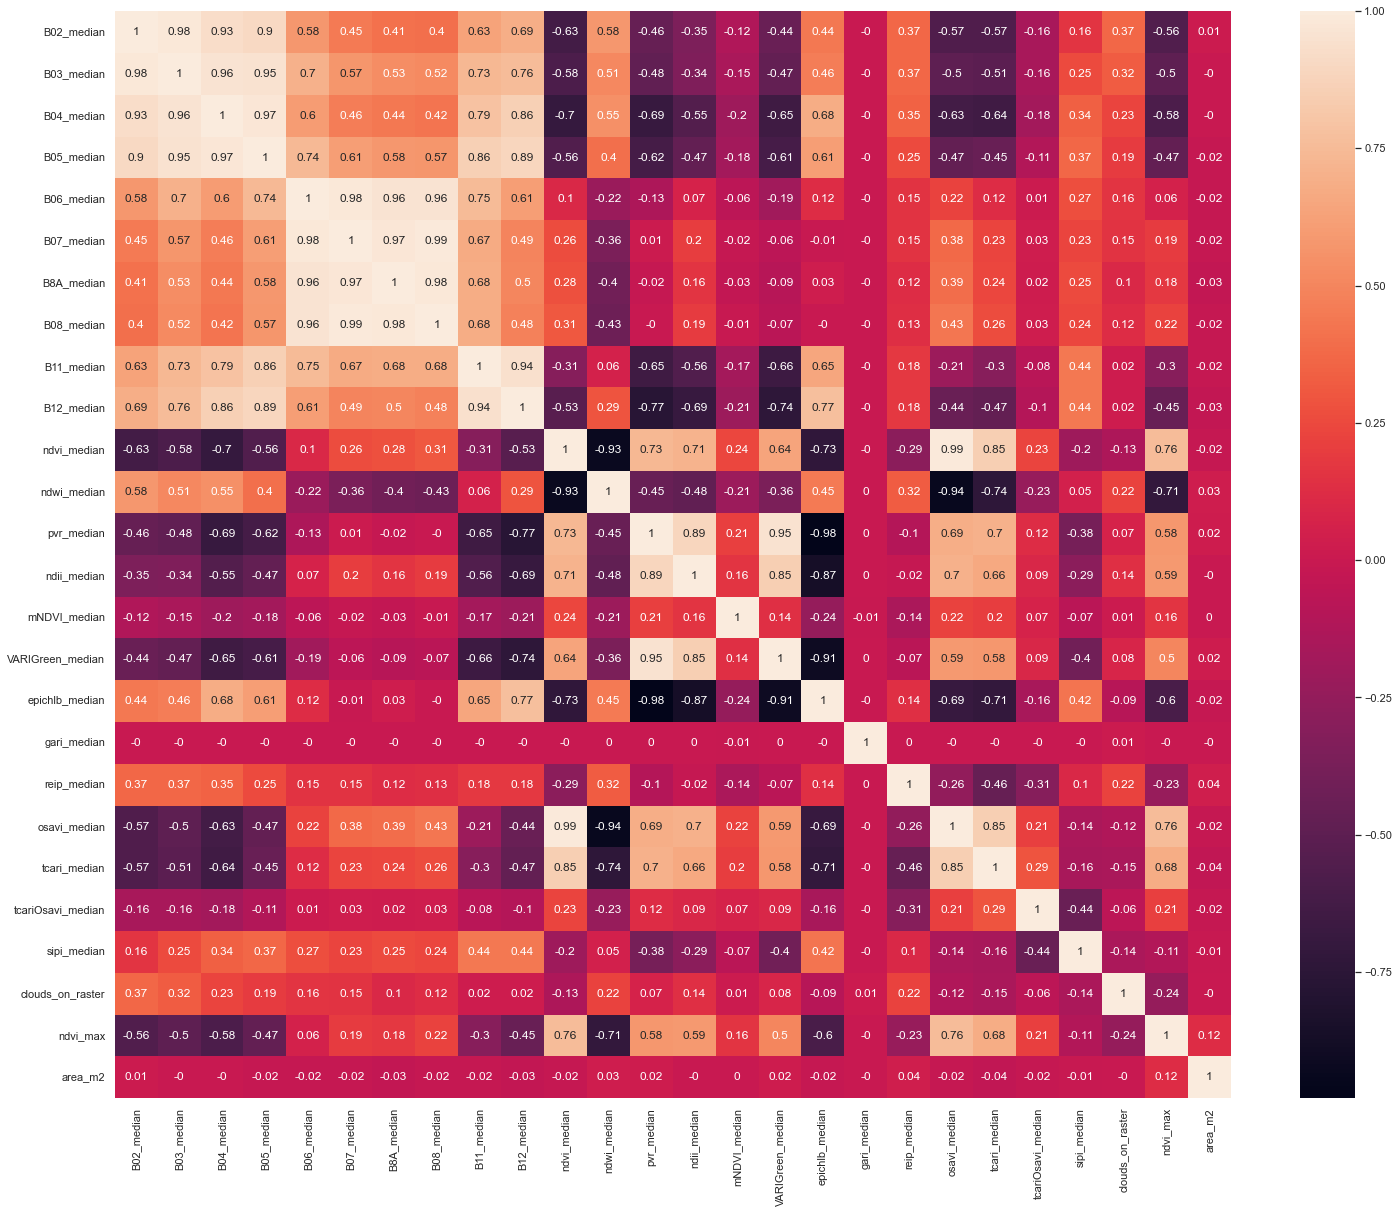

In [512]:
##se analiza la correlación de las variables 
sns.set(rc = {'figure.figsize':(25,20)})
correlation_matrix=df_verde_noverde[numerical_columns].corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [513]:
####se quitan aquellas variables con correlaciones mayores a 0.9 en términos absolutos
cor_matrix = df_verde_noverde[numerical_columns].corr().abs()
#print(cor_matrix)
#################
##Se analiza las correlaciones por encima de la diagnoal principal ya que la matriz de correlaciones es simétrica###############
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
#print(upper_tri)
###############
##se arma un listado de las variables con correlación mayor a 0,85.
##############
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.85)]
to_drop
################
##se quitan las variables con mayor correlación
############
df_verde_noverde = df_verde_noverde.drop(to_drop, axis=1)

<AxesSubplot:>

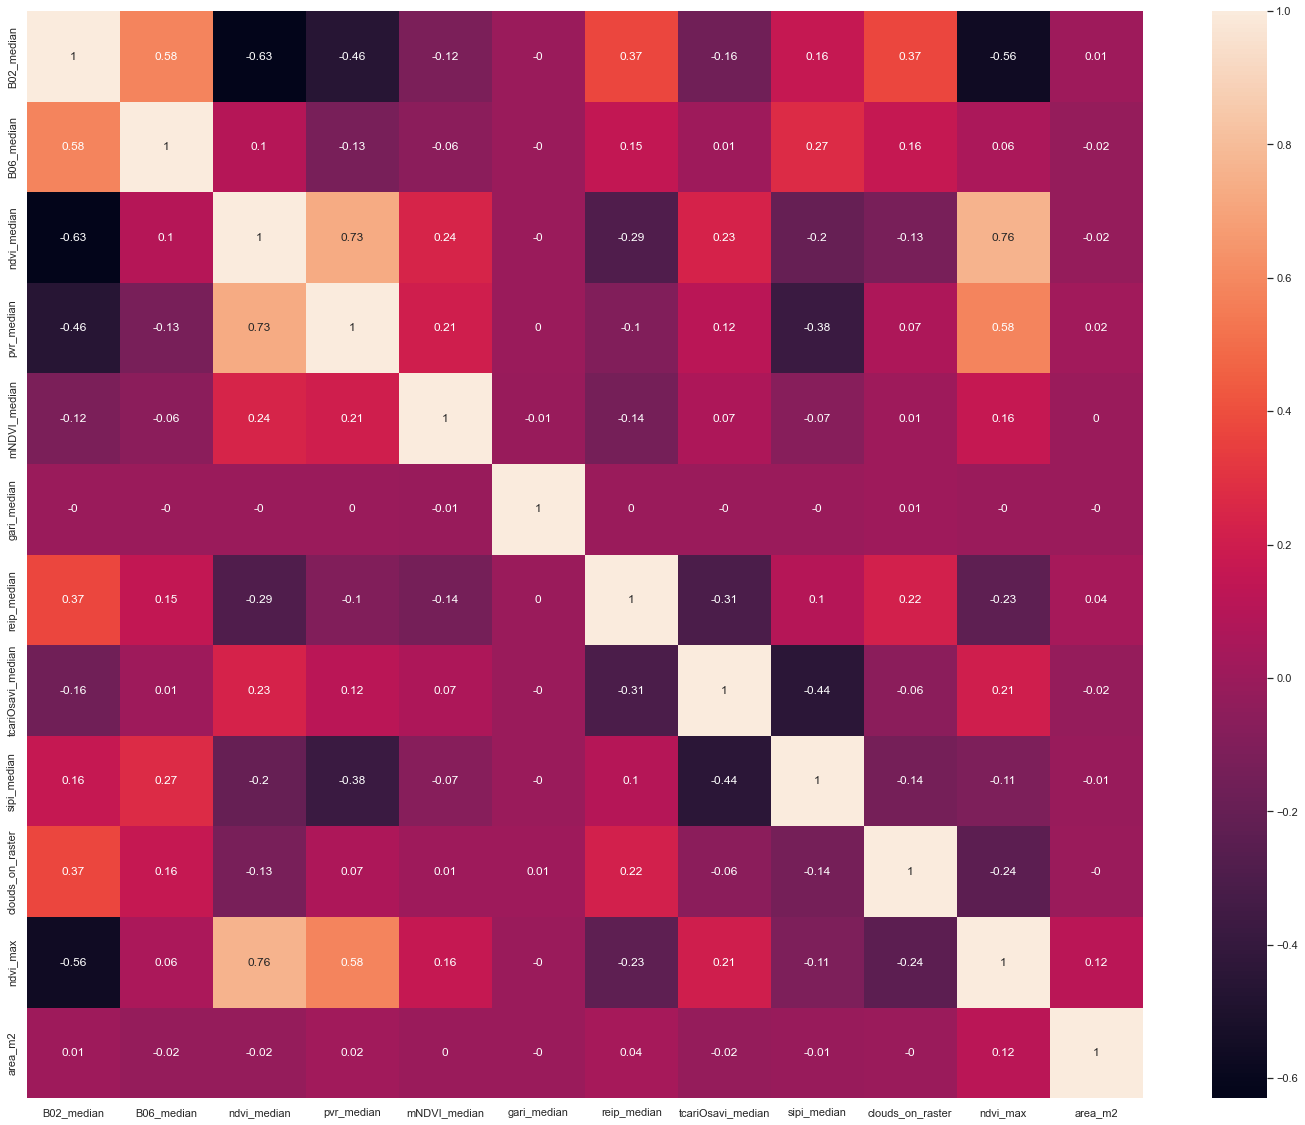

In [514]:
sns.set(rc = {'figure.figsize':(25,20)})
correlation_matrix=df_verde_noverde.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [515]:
# de nuevo se agrupan las variables en categóricas y numéricas
############
categorical_columns=[]
numerical_columns=[]
for i in df_verde_noverde.columns:
    if df_verde_noverde[i].dtype=='object':
        categorical_columns.append(i)
    elif df_verde_noverde[i].dtype in ['int64','float64']:
        numerical_columns.append(i)
################        
print(categorical_columns)
print(numerical_columns)
################

['osm_id', 'verde']
['B02_median', 'B06_median', 'ndvi_median', 'pvr_median', 'mNDVI_median', 'gari_median', 'reip_median', 'tcariOsavi_median', 'sipi_median', 'clouds_on_raster', 'ndvi_max', 'area_m2']


In [516]:
###genero una nueva variable que identifica cada espacio dado que la etiqueta osm_id tiene el caracter "-" y a veces eso genera error
df_verde_noverde['osm_id2'] = df_verde_noverde['osm_id'].astype(str)
df_verde_noverde['osm_id2'] = LabelEncoder().fit_transform(df_verde_noverde['osm_id2'])
df_verde_noverde.head(n=2)

,date,osm_id,B02_median,B06_median,ndvi_median,pvr_median,mNDVI_median,gari_median,reip_median,tcariOsavi_median,sipi_median,clouds_on_raster,ndvi_max,area_m2,verde,osm_id2
0,2017-01-03,605976736,0.0965,0.1991,0.547001,0.091723,1.301351,1.285897,722.173889,0.212710,0.884216,0.0,0.630881,4650.710032,1,866
1,2017-01-03,559322368,0.1066,0.2596,0.534292,0.053555,1.059602,1.061493,720.997009,0.240232,0.971875,0.0,0.630041,1502.000513,1,794


In [517]:
###############################
pd_id=df_verde_noverde.drop_duplicates(subset='osm_id2')
pd_id=pd_id[['osm_id2']]
pd_id.shape

##se generan nros aleatorios para dividir el dataset en training y test (se divide por observacion para conservar la independencia)
np.random.seed(42)
pd_id['wookie'] = (np.random.randint(0, 10000, pd_id.shape[0]))/10000
pd_id=pd_id[['osm_id2', 'wookie']]
pd_id.head(n=2)
##############
pd_id['MODELING_GROUP'] = np.where(((pd_id.wookie <= 0.65)), 'TRAINING', 'TESTING')
pd_id.head(n=5)
###################
tips_summed = pd_id.groupby(['MODELING_GROUP'])['wookie'].count()
tips_summed
##################
pd_id=pd_id.sort_values(by=['osm_id2'], ascending=[True])
pd_id.head(n=3)
pd_id=pd_id[['osm_id2','MODELING_GROUP']]
####################
df_=df_verde_noverde.merge(pd_id, on=['osm_id2'], how='left')
df_.head(n=2)

,date,osm_id,B02_median,B06_median,ndvi_median,pvr_median,mNDVI_median,gari_median,reip_median,tcariOsavi_median,sipi_median,clouds_on_raster,ndvi_max,area_m2,verde,osm_id2,MODELING_GROUP
0,2017-01-03,605976736,0.0965,0.1991,0.547001,0.091723,1.301351,1.285897,722.173889,0.212710,0.884216,0.0,0.630881,4650.710032,1,866,TESTING
1,2017-01-03,559322368,0.1066,0.2596,0.534292,0.053555,1.059602,1.061493,720.997009,0.240232,0.971875,0.0,0.630041,1502.000513,1,794,TRAINING


In [518]:
df_.columns

Index(['date', 'osm_id', 'B02_median', 'B06_median', 'ndvi_median',
       'pvr_median', 'mNDVI_median', 'gari_median', 'reip_median',
       'tcariOsavi_median', 'sipi_median', 'clouds_on_raster', 'ndvi_max',
       'area_m2', 'verde', 'osm_id2', 'MODELING_GROUP'],
      dtype='object')

In [519]:
df_['MODELING_GROUP'].value_counts()

TRAINING    199824
TESTING     105708
Name: MODELING_GROUP, dtype: int64

In [520]:
##se genera el train
train=df_[df_['MODELING_GROUP']=='TRAINING']
train.head(n=3)
train.verde.value_counts()

1    133584
0     66240
Name: verde, dtype: int64

In [521]:
##se genera el test
test=df_[df_['MODELING_GROUP']=='TESTING']
test.head(n=3)
test.verde.value_counts()

1    75348
0    30360
Name: verde, dtype: int64

In [522]:
##Normalizamos numéricas
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
####################
#############
##importante
minmax_scale = preprocessing.MinMaxScaler().fit(train[numerical_columns])
####
model = minmax_scale.fit(train[numerical_columns])
train[numerical_columns]=model.transform(train[numerical_columns])
train
################3
###############
model = minmax_scale.fit(test[numerical_columns])
test[numerical_columns]=model.transform(test[numerical_columns])
test.head(n=2)

,date,osm_id,B02_median,B06_median,ndvi_median,pvr_median,mNDVI_median,gari_median,reip_median,tcariOsavi_median,sipi_median,clouds_on_raster,ndvi_max,area_m2,verde,osm_id2,MODELING_GROUP
0,2017-01-03,605976736,0.053152,0.206668,0.687840,0.510012,0.090731,0.455715,0.642944,0.505393,0.598736,0.0,0.691311,0.028348,1,866,TESTING
9,2017-01-03,567533717,0.100958,0.275986,0.583211,0.415051,0.089322,0.450874,0.647178,0.496664,0.601296,0.0,0.577605,0.000423,1,803,TESTING


In [523]:
#test_=test[['date','osm_id','osm_id2','verde','ndvi_median', 'pvr_median', 'epichlb_median', 'osavi_median',
      # 'clouds_on_raster', 'ndvi_max']]
#test_

In [524]:
train_=train
test_=test

In [525]:
train_.verde.value_counts()

1    133584
0     66240
Name: verde, dtype: int64

In [526]:
test_.verde.value_counts()

1    75348
0    30360
Name: verde, dtype: int64

In [527]:
#from pathlib import Path  
#filepath = Path('C:/Users/Varios/Desktop/Diplodatos/verde_noverde.csv') 
#filepath.parent.mkdir(parents=True, exist_ok=True)  
#df_.to_csv(filepath) 

<AxesSubplot:>

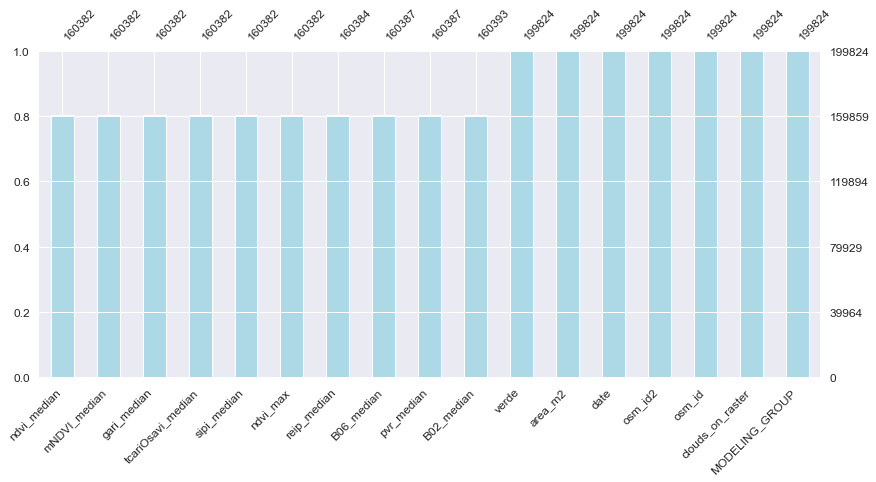

In [528]:
### se pasa a formato fecha a la variable date
train_['date'] = pd.to_datetime(train_['date'])
train_=train_.sort_values(by=['osm_id2','date'], ascending=[True,True])
import missingno as msno
msno.bar(train_,figsize=(14, 6), sort="ascending",fontsize=12, color='lightblue')

In [529]:
train_.columns

Index(['date', 'osm_id', 'B02_median', 'B06_median', 'ndvi_median',
       'pvr_median', 'mNDVI_median', 'gari_median', 'reip_median',
       'tcariOsavi_median', 'sipi_median', 'clouds_on_raster', 'ndvi_max',
       'area_m2', 'verde', 'osm_id2', 'MODELING_GROUP'],
      dtype='object')

<AxesSubplot:>

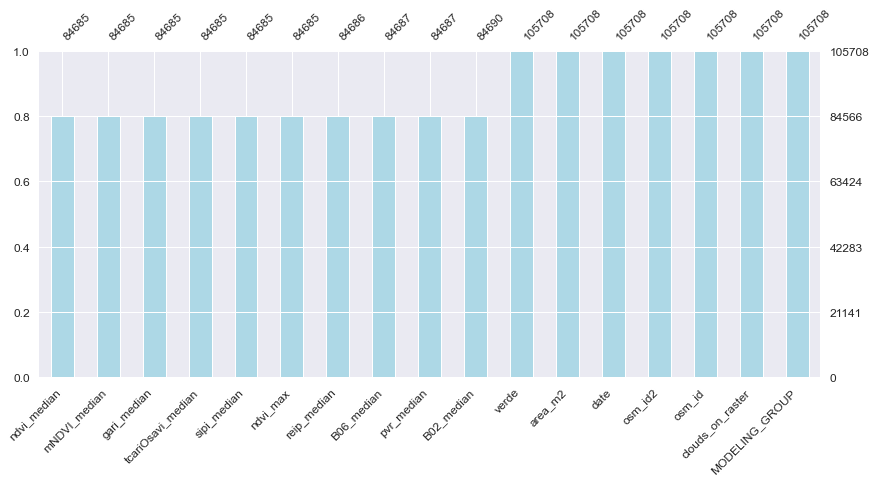

In [530]:
### formato fecha a la variable date
test_['date'] = pd.to_datetime(test_['date'])
test_=test_.sort_values(by=['osm_id2','date'], ascending=[True,True])
#####
msno.bar(test_,figsize=(14, 6), sort="ascending",fontsize=12, color='lightblue')

<AxesSubplot:>

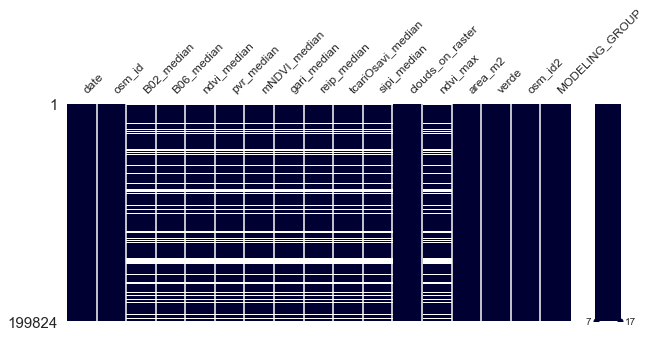

In [531]:
msno.matrix(train_,figsize=(10, 4), fontsize=12, color=[0,0,0.2])

<AxesSubplot:>

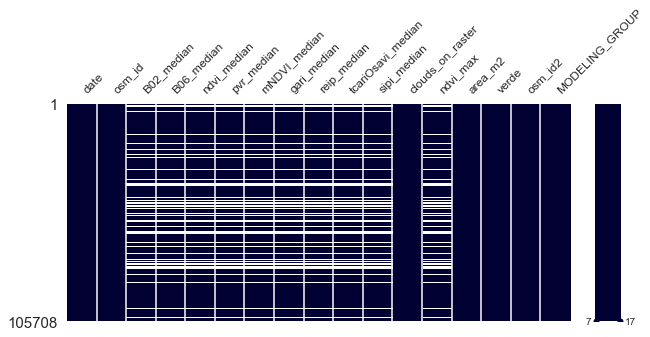

In [532]:
msno.matrix(test_,figsize=(10, 4), fontsize=12, color=[0,0,0.2])

In [533]:
categorical_columns=[]
numerical_columns=[]
for i in train_.columns:
    if train_[i].dtype=='object':
        categorical_columns.append(i)
    elif train_[i].dtype in ['int64','float64']:
        numerical_columns.append(i)
######################
numerical=list(train_[numerical_columns].columns.values)

In [534]:
numerical

['B02_median',
 'B06_median',
 'ndvi_median',
 'pvr_median',
 'mNDVI_median',
 'gari_median',
 'reip_median',
 'tcariOsavi_median',
 'sipi_median',
 'clouds_on_raster',
 'ndvi_max',
 'area_m2']

In [535]:
###quitamos las observaciones que tienen NAs en la mayoría de los indicadores que estaría explicado por los días que
##no pasa el satélite por la zona##
train_= train_[~((train_['B02_median'].isnull()==True) &
              (train_['B06_median'].isnull()==True) &
               #(train_['B11_median'].isnull()==True) &
               (train_['ndvi_median'].isnull()==True) &
               (train_['pvr_median'].isnull()==True) &
               #(train_['ndii_median'].isnull()==True) &
               (train_['mNDVI_median'].isnull()==True) &
               (train_['gari_median'].isnull()==True) &
               (train_['reip_median'].isnull()==True) &
               #(train_['tcari_median'].isnull()==True) &
               (train_['tcariOsavi_median'].isnull()==True) &
               (train_['sipi_median'].isnull()==True) &
               (train_['ndvi_max'].isnull()==True) 
               )]
train_.shape

(160394, 17)

In [536]:
test_.columns

Index(['date', 'osm_id', 'B02_median', 'B06_median', 'ndvi_median',
       'pvr_median', 'mNDVI_median', 'gari_median', 'reip_median',
       'tcariOsavi_median', 'sipi_median', 'clouds_on_raster', 'ndvi_max',
       'area_m2', 'verde', 'osm_id2', 'MODELING_GROUP'],
      dtype='object')

In [537]:
###quitamos las observaciones que tienen NAs en la mayoría de los indicadores que estaría explicado por los días que
##no pasa el satélite por la zona##
test_= test_[~((test_['B02_median'].isnull()==True) &
              (test_['B06_median'].isnull()==True) &
               #(test_['B11_median'].isnull()==True) &
               (test_['ndvi_median'].isnull()==True) &
               (test_['pvr_median'].isnull()==True) &
               #(test_['ndii_median'].isnull()==True) &
               (test_['mNDVI_median'].isnull()==True) &
               (test_['gari_median'].isnull()==True) &
               (test_['reip_median'].isnull()==True) &
               #(test_['tcari_median'].isnull()==True) &
               (test_['tcariOsavi_median'].isnull()==True) &
               (test_['sipi_median'].isnull()==True) &
               (test_['ndvi_max'].isnull()==True)

              )]
test_.shape

(84691, 17)

<AxesSubplot:>

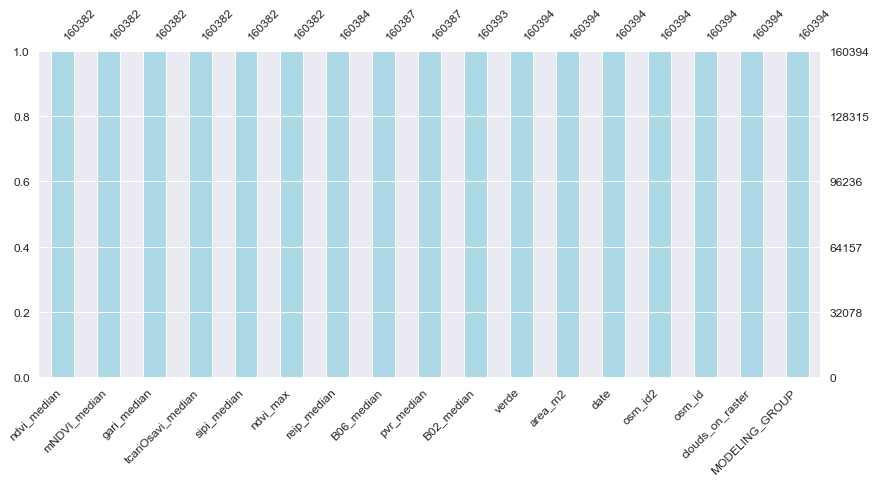

In [538]:
msno.bar(train_,figsize=(14, 6), sort="ascending",fontsize=12, color='lightblue')

<AxesSubplot:>

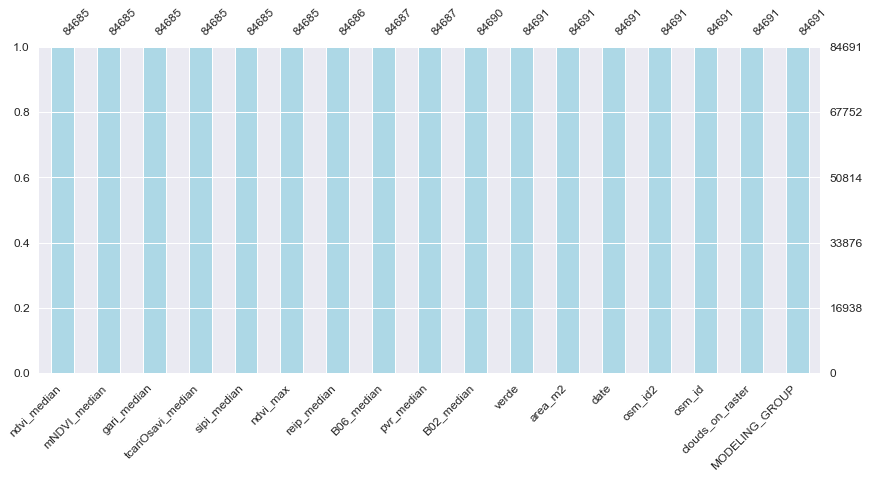

In [539]:
msno.bar(test_,figsize=(14, 6), sort="ascending",fontsize=12, color='lightblue')

<AxesSubplot:>

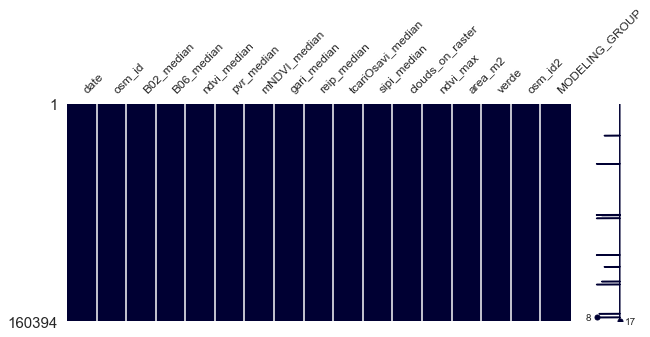

In [540]:
msno.matrix(train_,figsize=(10, 4), fontsize=12, color=[0,0,0.2])

<AxesSubplot:>

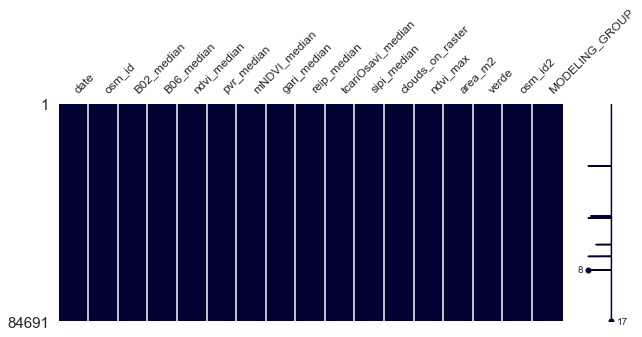

In [541]:
msno.matrix(test_,figsize=(10, 4), fontsize=12, color=[0,0,0.2])

In [542]:
numerical

['B02_median',
 'B06_median',
 'ndvi_median',
 'pvr_median',
 'mNDVI_median',
 'gari_median',
 'reip_median',
 'tcariOsavi_median',
 'sipi_median',
 'clouds_on_raster',
 'ndvi_max',
 'area_m2']

In [543]:
###Para imputar los NAs se prueba con el método de interpolación lineal
######################################
col_list=numerical
####################################
##train
for col in col_list:
              namer=col+'_linear_imputed'
              train_[namer]= train_[col].interpolate(method='linear')
##test
for col in col_list:
              namer=col+'_linear_imputed'
              test_[namer]= test_[col].interpolate(method='linear')
test_.head(n=3)

,date,osm_id,B02_median,B06_median,ndvi_median,pvr_median,mNDVI_median,gari_median,reip_median,tcariOsavi_median,...,ndvi_median_linear_imputed,pvr_median_linear_imputed,mNDVI_median_linear_imputed,gari_median_linear_imputed,reip_median_linear_imputed,tcariOsavi_median_linear_imputed,sipi_median_linear_imputed,clouds_on_raster_linear_imputed,ndvi_max_linear_imputed,area_m2_linear_imputed
209247,2017-01-03,100-nev,0.114445,0.261011,0.498360,0.269295,0.088346,0.447259,0.650975,0.455213,...,0.498360,0.269295,0.088346,0.447259,0.650975,0.455213,0.603980,0.0,0.692483,0.208603
210017,2017-02-12,100-nev,0.091301,0.232281,0.533931,0.325253,0.089129,0.450152,0.643852,0.484987,...,0.533931,0.325253,0.089129,0.450152,0.643852,0.484987,0.601745,0.0,0.664315,0.208603
210363,2017-02-22,100-nev,0.099122,0.233772,0.513768,0.307883,0.088765,0.448817,0.650322,0.466062,...,0.513768,0.307883,0.088765,0.448817,0.650322,0.466062,0.602699,0.0,0.689868,0.208603


In [544]:
###el train y test siguen siendo desbalanceados

In [545]:
train_['verde'].value_counts()

1    107041
0     53353
Name: verde, dtype: int64

In [546]:
test_['verde'].value_counts()

1    60230
0    24461
Name: verde, dtype: int64

In [547]:
#plt.figure(figsize=(7,10))
#import seaborn as sns
#sns.set(style="whitegrid")
#ax = sns.boxplot(y='ndvi_median', x='verde', data=train_, palette="Set3")

In [548]:
#plt.figure(figsize=(7,10))
#import seaborn as sns
#sns.set(style="whitegrid")
#ax = sns.boxplot(y='area_m2', x='verde', data=df_, palette="Set3")

In [549]:
train_.head(n=2)

,date,osm_id,B02_median,B06_median,ndvi_median,pvr_median,mNDVI_median,gari_median,reip_median,tcariOsavi_median,...,ndvi_median_linear_imputed,pvr_median_linear_imputed,mNDVI_median_linear_imputed,gari_median_linear_imputed,reip_median_linear_imputed,tcariOsavi_median_linear_imputed,sipi_median_linear_imputed,clouds_on_raster_linear_imputed,ndvi_max_linear_imputed,area_m2_linear_imputed
209169,2017-01-03,0-nev,0.236198,0.336801,0.457524,0.329374,0.335995,2.673179e-37,0.439965,0.338545,...,0.457524,0.329374,0.335995,2.673179e-37,0.439965,0.338545,0.814261,0.0,0.640642,0.022583
209984,2017-02-12,0-nev,0.208209,0.325010,0.464257,0.343880,0.337683,2.678318e-37,0.427041,0.340248,...,0.464257,0.343880,0.337683,2.678318e-37,0.427041,0.340248,0.813690,0.0,0.688817,0.022583


In [550]:
##replico nuevamente osm_id22 así la tengo como variable para graficar y también como índice
train_['osm_id22']=train_['osm_id2']
test_['osm_id22']=test_['osm_id2']

In [551]:
train_.shape

(160394, 30)

In [552]:
feature_window=14

In [553]:
train_['date1']=train_['date']
test_['date1']=test_['date']
train_['date1'] = pd.to_datetime(train_['date1'])
test_['date1'] = pd.to_datetime(test_['date1'])

In [554]:
##Buffer each entity train
####################################################################################################################
###Se crea una nueva variable llamada  “flipper”  que indica cuando cambia el osm_id previo ordenar el dataset por fecha y osm_id
train_['flipper'] = np.where((train_.osm_id2 != train_.osm_id2.shift(1)), 1, 0)
train_.head()
##########################################################################################################
##Se calculan el nro de d{ias desde que el espacio aparece en la base:  “TIME_SINCE_START” 
## la variable "too_soon.” toma el valor 1 si hay menos de los días definidos en "feature window".
##We will use these new variables to create a running mean, median, max, and min.
#Select the first record of each machine
starter=train_[train_['flipper'] == 1]
starter=starter[['date','osm_id2']]
#rename date to start_date
starter=starter.rename(index=str, columns={"date": "START_DATE"})
#convert START_DATE to date
starter['START_DATE'] = pd.to_datetime(starter['START_DATE'])
#Merge START_DATE to the original data set
train_=train_.sort_values(by=['osm_id2', 'date'], ascending=[True, True])
starter=starter.sort_values(by=['osm_id2'], ascending=[True])
train_ =train_.merge(starter, on=['osm_id2'], how='left')
# calculate the number of days since the beginning of each well. 
train_['C'] = train_['date'] - train_['START_DATE']
train_['TIME_SINCE_START'] = train_['C'] / np.timedelta64(1, 'D')
train_=train_.drop(columns=['C'])
train_['too_soon'] = np.where((train_.TIME_SINCE_START < feature_window) , 1, 0)
###############################################################################################

In [555]:
##Buffer each entity test
####################################################################################################################
test_['flipper'] = np.where((test_.osm_id2 != test_.osm_id2.shift(1)), 1, 0)
test_.head()
##########################################################################################################
#Select the first record of each machine
starter=test_[test_['flipper'] == 1]
starter=starter[['date','osm_id2']]
#rename date to start_date
starter=starter.rename(index=str, columns={"date": "START_DATE"})
#convert START_DATE to date
starter['START_DATE'] = pd.to_datetime(starter['START_DATE'])
#Merge START_DATE to the original data set
test_=test_.sort_values(by=['osm_id2', 'date'], ascending=[True, True])
starter=starter.sort_values(by=['osm_id2'], ascending=[True])
test_ =test_.merge(starter, on=['osm_id2'], how='left')
# calculate the number of days since the beginning of each well. 
test_['C'] = test_['date'] - test_['START_DATE']
test_['TIME_SINCE_START'] = test_['C'] / np.timedelta64(1, 'D')
test_=test_.drop(columns=['C'])
test_['too_soon'] = np.where((test_.TIME_SINCE_START < feature_window) , 1, 0)

In [556]:
import pandas as pd
conteotrain=train_['date'].value_counts().rename_axis('date').to_frame('counts')
conteotrain.head(n=2)

,counts
date,
2017-01-03,724
2021-07-16,724


In [557]:
conteotest=test_['date'].value_counts().rename_axis('date').to_frame('counts')
conteotest.head(n=2)

,counts
date,
2017-01-03,383
2020-07-16,383


In [558]:
train_=train_.merge(conteotrain, on=['date'], how='inner')
train_.head(n=2)

,date,osm_id,B02_median,B06_median,ndvi_median,pvr_median,mNDVI_median,gari_median,reip_median,tcariOsavi_median,...,clouds_on_raster_linear_imputed,ndvi_max_linear_imputed,area_m2_linear_imputed,osm_id22,date1,flipper,START_DATE,TIME_SINCE_START,too_soon,counts
0,2017-01-03,0-nev,0.236198,0.336801,0.457524,0.329374,0.335995,2.673179e-37,0.439965,0.338545,...,0.0,0.640642,0.022583,0,2017-01-03,1,2017-01-03,0.0,1,724
1,2017-01-03,1-nev,0.201980,0.332501,0.461795,0.328295,0.335674,2.672927e-37,0.443046,0.337009,...,0.0,0.668839,0.022583,1,2017-01-03,1,2017-01-03,0.0,1,724


In [559]:
test_=test_.merge(conteotest, on=['date'], how='inner')
test_.head(n=2)

,date,osm_id,B02_median,B06_median,ndvi_median,pvr_median,mNDVI_median,gari_median,reip_median,tcariOsavi_median,...,clouds_on_raster_linear_imputed,ndvi_max_linear_imputed,area_m2_linear_imputed,osm_id22,date1,flipper,START_DATE,TIME_SINCE_START,too_soon,counts
0,2017-01-03,100-nev,0.114445,0.261011,0.498360,0.269295,0.088346,0.447259,0.650975,0.455213,...,0.0,0.692483,0.208603,3,2017-01-03,1,2017-01-03,0.0,1,383
1,2017-01-03,102-nev,0.145251,0.294213,0.379567,0.231597,0.086720,0.440949,0.648003,0.473340,...,0.0,0.617828,0.208603,6,2017-01-03,1,2017-01-03,0.0,1,383


In [560]:
###se eligen las series de tiempo con igual cantidad de fechas para que corran los modelos
max_train=max(train_['counts'])
max_test=max(test_['counts'])

In [561]:
train_=train_[train_['counts']==max_train]
train_.head(n=2)

,date,osm_id,B02_median,B06_median,ndvi_median,pvr_median,mNDVI_median,gari_median,reip_median,tcariOsavi_median,...,clouds_on_raster_linear_imputed,ndvi_max_linear_imputed,area_m2_linear_imputed,osm_id22,date1,flipper,START_DATE,TIME_SINCE_START,too_soon,counts
0,2017-01-03,0-nev,0.236198,0.336801,0.457524,0.329374,0.335995,2.673179e-37,0.439965,0.338545,...,0.0,0.640642,0.022583,0,2017-01-03,1,2017-01-03,0.0,1,724
1,2017-01-03,1-nev,0.201980,0.332501,0.461795,0.328295,0.335674,2.672927e-37,0.443046,0.337009,...,0.0,0.668839,0.022583,1,2017-01-03,1,2017-01-03,0.0,1,724


In [562]:
test_=test_[test_['counts']==max_test]
test_.head(n=2)

,date,osm_id,B02_median,B06_median,ndvi_median,pvr_median,mNDVI_median,gari_median,reip_median,tcariOsavi_median,...,clouds_on_raster_linear_imputed,ndvi_max_linear_imputed,area_m2_linear_imputed,osm_id22,date1,flipper,START_DATE,TIME_SINCE_START,too_soon,counts
0,2017-01-03,100-nev,0.114445,0.261011,0.498360,0.269295,0.088346,0.447259,0.650975,0.455213,...,0.0,0.692483,0.208603,3,2017-01-03,1,2017-01-03,0.0,1,383
1,2017-01-03,102-nev,0.145251,0.294213,0.379567,0.231597,0.086720,0.440949,0.648003,0.473340,...,0.0,0.617828,0.208603,6,2017-01-03,1,2017-01-03,0.0,1,383


In [563]:
#from pathlib import Path  
#filepath = Path('C:/Users/Varios/Desktop/Diplodatos/dfx.csv') 
#filepath.parent.mkdir(parents=True, exist_ok=True)  
#dfx.to_csv(filepath) 

In [564]:
import plotly.graph_objs as go
import plotly as plotly

In [565]:
col_list=numerical

In [566]:
###Create rolling summaries para un grupo de variables para suavizar las series
##########################################
####Rolling summaries###################
###################################
for col in col_list:
     #for x in range(1, (feature_window+1)):
        #qq=str(x)
        qq=str(feature_window)
        namer=col+'_'+qq+'_'+'Mean'
        train_[namer] = np.where((train_.too_soon == 0),(train_[col].rolling(min_periods=1, window=feature_window).mean()), train_[col])

In [567]:
test_.columns

Index(['date', 'osm_id', 'B02_median', 'B06_median', 'ndvi_median',
       'pvr_median', 'mNDVI_median', 'gari_median', 'reip_median',
       'tcariOsavi_median', 'sipi_median', 'clouds_on_raster', 'ndvi_max',
       'area_m2', 'verde', 'osm_id2', 'MODELING_GROUP',
       'B02_median_linear_imputed', 'B06_median_linear_imputed',
       'ndvi_median_linear_imputed', 'pvr_median_linear_imputed',
       'mNDVI_median_linear_imputed', 'gari_median_linear_imputed',
       'reip_median_linear_imputed', 'tcariOsavi_median_linear_imputed',
       'sipi_median_linear_imputed', 'clouds_on_raster_linear_imputed',
       'ndvi_max_linear_imputed', 'area_m2_linear_imputed', 'osm_id22',
       'date1', 'flipper', 'START_DATE', 'TIME_SINCE_START', 'too_soon',
       'counts'],
      dtype='object')

In [568]:
for col in col_list:
     #for x in range(1, (feature_window+1)):
        #qq=str(x)
        qq=str(feature_window)
        namer=col+'_'+qq+'_'+'Mean'
        test_[namer] = np.where((test_.too_soon == 0),(test_[col].rolling(min_periods=1, window=feature_window).mean()), test_[col])

In [569]:
###Create lags para un grupo de variables
##########################################
####################################
for col in col_list:
        namer=col+'_'+'lag'
        train_[namer] = np.where((train_.too_soon == 0),(train_[col].shift(2)), train_[col])
####################################
###################################
for col in col_list:
        namer=col+'_'+'lag'
        test_[namer] = np.where((test_.too_soon == 0),(test_[col].shift(2)), test_[col])                

In [570]:
###Para imputar los faltantes se prueba con el método de interpolación lineal
###################################
for col in col_list:
              namer=col+'_linear_imputed'
              train_[namer]= train_[col].interpolate(method='linear')
train_.head(n=3)
###################################
for col in col_list:
              namer=col+'_linear_imputed'
              test_[namer]= test_[col].interpolate(method='linear')
test_.head(n=3)

,date,osm_id,B02_median,B06_median,ndvi_median,pvr_median,mNDVI_median,gari_median,reip_median,tcariOsavi_median,...,ndvi_median_lag,pvr_median_lag,mNDVI_median_lag,gari_median_lag,reip_median_lag,tcariOsavi_median_lag,sipi_median_lag,clouds_on_raster_lag,ndvi_max_lag,area_m2_lag
0,2017-01-03,100-nev,0.114445,0.261011,0.498360,0.269295,0.088346,0.447259,0.650975,0.455213,...,0.498360,0.269295,0.088346,0.447259,0.650975,0.455213,0.603980,0.0,0.692483,0.208603
1,2017-01-03,102-nev,0.145251,0.294213,0.379567,0.231597,0.086720,0.440949,0.648003,0.473340,...,0.379567,0.231597,0.086720,0.440949,0.648003,0.473340,0.610758,0.0,0.617828,0.208603
2,2017-01-03,103-nev,0.102793,0.276867,0.565094,0.342957,0.088965,0.449580,0.648510,0.486112,...,0.565094,0.342957,0.088965,0.449580,0.648510,0.486112,0.602143,0.0,0.821165,0.208603


In [571]:
from pathlib import Path  
filepath = Path('C:/Users/Varios/Desktop/Diplodatos/train.csv') 
filepath.parent.mkdir(parents=True, exist_ok=True)  
train.to_csv(filepath) 
###################################
from pathlib import Path  
filepath = Path('C:/Users/Varios/Desktop/Diplodatos/test.csv') 
filepath.parent.mkdir(parents=True, exist_ok=True)  
test.to_csv(filepath) 

In [572]:
numerical

['B02_median',
 'B06_median',
 'ndvi_median',
 'pvr_median',
 'mNDVI_median',
 'gari_median',
 'reip_median',
 'tcariOsavi_median',
 'sipi_median',
 'clouds_on_raster',
 'ndvi_max',
 'area_m2']

In [573]:
train_.columns

Index(['date', 'osm_id', 'B02_median', 'B06_median', 'ndvi_median',
       'pvr_median', 'mNDVI_median', 'gari_median', 'reip_median',
       'tcariOsavi_median', 'sipi_median', 'clouds_on_raster', 'ndvi_max',
       'area_m2', 'verde', 'osm_id2', 'MODELING_GROUP',
       'B02_median_linear_imputed', 'B06_median_linear_imputed',
       'ndvi_median_linear_imputed', 'pvr_median_linear_imputed',
       'mNDVI_median_linear_imputed', 'gari_median_linear_imputed',
       'reip_median_linear_imputed', 'tcariOsavi_median_linear_imputed',
       'sipi_median_linear_imputed', 'clouds_on_raster_linear_imputed',
       'ndvi_max_linear_imputed', 'area_m2_linear_imputed', 'osm_id22',
       'date1', 'flipper', 'START_DATE', 'TIME_SINCE_START', 'too_soon',
       'counts', 'B02_median_14_Mean', 'B06_median_14_Mean',
       'ndvi_median_14_Mean', 'pvr_median_14_Mean', 'mNDVI_median_14_Mean',
       'gari_median_14_Mean', 'reip_median_14_Mean',
       'tcariOsavi_median_14_Mean', 'sipi_median_14_Mea

In [994]:
###se quitan este grupo de columnas ( son las originales que luego fueron imputadas). 
X_train = train_.drop((['osm_id','osm_id22','date1','verde','flipper','START_DATE','TIME_SINCE_START','counts','too_soon','MODELING_GROUP']),axis=1)
X_train = X_train.drop(numerical,axis=1)
### como al correr el algoritmo timeseriesrandomforest me indica error por NAS estoy probando variables
X_train=X_train[['osm_id2','date','B02_median_linear_imputed','B06_median_linear_imputed']]
X_train.head(n=2)

,osm_id2,date,B02_median_linear_imputed,B06_median_linear_imputed
0,0,2017-01-03,0.236198,0.336801
1,1,2017-01-03,0.201980,0.332501


In [995]:
###se quitan este grupo de columnas (son las originales que luego fueron imputadas). 

In [996]:
X_test = test_.drop((['osm_id','osm_id22','date1','verde','flipper','START_DATE','TIME_SINCE_START','counts','too_soon','MODELING_GROUP']),axis=1)
X_test = X_test.drop(numerical,axis=1)
### como al correr el algoritmo timeseriesrandomforest me indica error por NAS estoy probando variables
X_test=X_test[['osm_id2','date','B02_median_linear_imputed','B06_median_linear_imputed']]
X_test.head(n=2)

,osm_id2,date,B02_median_linear_imputed,B06_median_linear_imputed
0,3,2017-01-03,0.114445,0.261011
1,6,2017-01-03,0.145251,0.294213


In [997]:
X_train= X_train.set_index(['osm_id2','date']) 
X_test= X_test.set_index(['osm_id2','date']) 

In [998]:
X_test.shape

(60514, 2)

In [999]:
X_test.head(n=2)

,,B02_median_linear_imputed,B06_median_linear_imputed
osm_id2,date,,
3,2017-01-03,0.114445,0.261011
6,2017-01-03,0.145251,0.294213


In [1000]:
X_train.head(n=2)

,,B02_median_linear_imputed,B06_median_linear_imputed
osm_id2,date,,
0,2017-01-03,0.236198,0.336801
1,2017-01-03,0.201980,0.332501


<AxesSubplot:>

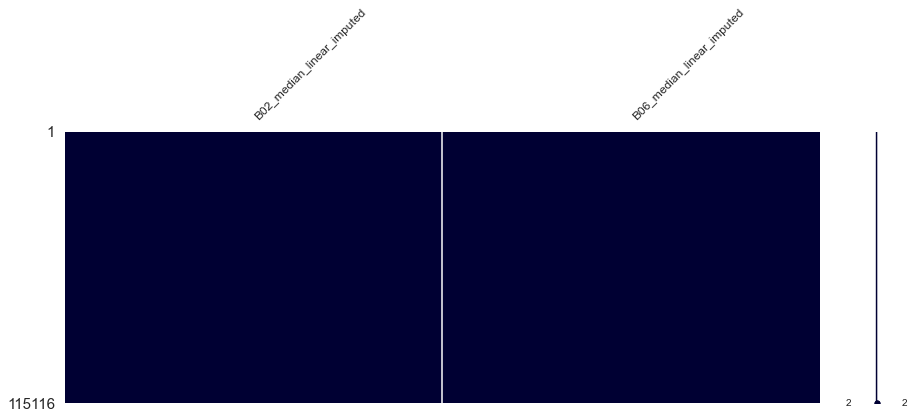

In [1001]:
msno.matrix(X_train,figsize=(15, 5), fontsize=12, color=[0,0,0.2])

In [1002]:
X_train.isnull().sum(axis = 0)

B02_median_linear_imputed    0
B06_median_linear_imputed    0
dtype: int64

In [1003]:
X_train.shape

(115116, 2)

In [1004]:
X_test.isnull().sum(axis = 0)

B02_median_linear_imputed    0
B06_median_linear_imputed    0
dtype: int64

In [1005]:
X_test.shape

(60514, 2)

In [1006]:
X_train.head(n=2)

,,B02_median_linear_imputed,B06_median_linear_imputed
osm_id2,date,,
0,2017-01-03,0.236198,0.336801
1,2017-01-03,0.201980,0.332501


In [1007]:
X_train.columns

Index(['B02_median_linear_imputed', 'B06_median_linear_imputed'], dtype='object')

In [1008]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 115116 entries, (0, Timestamp('2017-01-03 00:00:00')) to (1106, Timestamp('2022-04-17 00:00:00'))
Data columns (total 2 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   B02_median_linear_imputed  115116 non-null  float64
 1   B06_median_linear_imputed  115116 non-null  float64
dtypes: float64(2)
memory usage: 2.2 MB


In [1009]:
from sklearn.pipeline import Pipeline
#from sktime.classification.shapelet_based import MrSEQLClassifier

In [1010]:
## se cambia el formato del dataset para utilizar los algoritmos de sktime
from sktime.datatypes._panel._convert import (
   from_multi_index_to_nested,
  from_nested_to_multi_index,
)

In [1011]:
from sktime.datatypes._panel._convert import (
    from_3d_numpy_to_nested,
    from_multi_index_to_3d_numpy,
    from_nested_to_3d_numpy,
)

In [1012]:
X_train.head(n=2)

,,B02_median_linear_imputed,B06_median_linear_imputed
osm_id2,date,,
0,2017-01-03,0.236198,0.336801
1,2017-01-03,0.201980,0.332501


In [1013]:
X_test.head(n=2)
X_test.shape

(60514, 2)

In [1014]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 60514 entries, (3, Timestamp('2017-01-03 00:00:00')) to (1105, Timestamp('2022-04-17 00:00:00'))
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   B02_median_linear_imputed  60514 non-null  float64
 1   B06_median_linear_imputed  60514 non-null  float64
dtypes: float64(2)
memory usage: 1.2 MB


In [1015]:
X_train.describe()

,B02_median_linear_imputed,B06_median_linear_imputed
count,115116.000000,115116.000000
mean,0.111134,0.257844
std,0.039733,0.050889
min,0.010240,0.000000
25%,0.082857,0.224858
50%,0.105726,0.259190
75%,0.133970,0.291580
max,0.533578,0.643501


In [1016]:
X_test.describe()

,B02_median_linear_imputed,B06_median_linear_imputed
count,60514.000000,60514.000000
mean,0.101724,0.226923
std,0.034276,0.045859
min,0.009896,0.004743
25%,0.077175,0.194877
50%,0.098404,0.227538
75%,0.122267,0.257555
max,0.674701,0.753964


In [1017]:
###no funcionaba
###xx=from_multi_index_to_3d_numpy(X_test)
##xx

In [1018]:
##Links útiles
##https://www.sktime.org/en/v0.8.2/index.html
####https://medium.com/swlh/using-sktime-for-time-series-classification-part-2-b07bb6b56d5
###http://learningsys.org/neurips19/assets/papers/sktime_ml_systems_neurips2019.pdf

In [1019]:
#from pathlib import Path  
#filepath = Path('C:/Users/Varios/Desktop/Diplodatos/X_train.csv') 
#filepath.parent.mkdir(parents=True, exist_ok=True)  
#X_train.to_csv(filepath) 

In [1020]:
###seleccion variables
#X_train=X_train.iloc[:,:3]
#X_test=X_test.iloc[:,:3]

In [1021]:
## se adapta la forma del dataset para poder utilizar el paquete sktime
X_train_nested = from_multi_index_to_nested(X_train, instance_index="osm_id2")
X_train_nested.head(n=2)

,B02_median_linear_imputed,B06_median_linear_imputed
osm_id2,,
0,2017-01-03 0.236198 2017-02-12 0.208209 ...,2017-01-03 0.336801 2017-02-12 0.325010 ...
1,2017-01-03 0.201980 2017-02-12 0.183719 ...,2017-01-03 0.332501 2017-02-12 0.314537 ...


In [1022]:
## se adapta la forma del dataset para poder utilizar el paquete sktime
X_test_nested = from_multi_index_to_nested(X_test, instance_index="osm_id2")
X_test_nested.head(n=2)

,B02_median_linear_imputed,B06_median_linear_imputed
osm_id2,,
3,2017-01-03 0.114445 2017-02-12 0.091301 ...,2017-01-03 0.261011 2017-02-12 0.232281 ...
6,2017-01-03 0.145251 2017-02-12 0.105347 ...,2017-01-03 0.294213 2017-02-12 0.246646 ...


In [1023]:
###esto sería para revertir la transformación del dataset
###from_nested_to_multi_index(X_test_nested, instance_index='osm_id22', time_index='date').head(n=2)

In [1024]:
## se genera el vector con las clases
y_train=train_[['osm_id2','verde']].drop_duplicates()
y_train=y_train['verde']
y_train=np.asarray(y_train)

In [1025]:
## se genera el vector con las clases
y_test=test_[['osm_id2','verde']].drop_duplicates()
y_test=y_test['verde']
y_test=np.asarray(y_test)
y_test

array(['0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '1', '1',
       '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1',
       '1', '1', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '0',
       '0', '0', '0', '0', '1', '1', '0', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0',
       '0', '0', '0', '1', '0', '1', '1', '1', '0', '0', '1', '1', '1',
       '1', '1', '0', '0', '1', '1', '1', '1', '1', '1', '0', '1', '0',
       '1', '1', '0', '0', '0', '1', '0', '0', '1', '1', '1', '1', '1',
       '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '0', '0', '1', '0', '0', '1', '1', '1', '1', '0',
       '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '0', '0', '1',
       '1', '1', '1', '0', '1', '1', '1', '1', '1', '0', '1', '1', '1',
       '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0

In [1026]:
X_train_nested.shape

(724, 2)

In [1027]:
X_test_nested.shape

(383, 2)

In [1028]:
y_test

array(['0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '1', '1',
       '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1',
       '1', '1', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '0',
       '0', '0', '0', '0', '1', '1', '0', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0',
       '0', '0', '0', '1', '0', '1', '1', '1', '0', '0', '1', '1', '1',
       '1', '1', '0', '0', '1', '1', '1', '1', '1', '1', '0', '1', '0',
       '1', '1', '0', '0', '0', '1', '0', '0', '1', '1', '1', '1', '1',
       '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '0', '0', '1', '0', '0', '1', '1', '1', '1', '0',
       '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '0', '0', '1',
       '1', '1', '1', '0', '1', '1', '1', '1', '1', '0', '1', '1', '1',
       '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0

In [1029]:
####Se prueban diferentes métodos de clasificación de series de tiempo de la librería sktime

In [1030]:
###Se prueba con Time Series Forest Classifier (corrió!!)
steps = [('concatenate', ColumnConcatenator()),('classify', TimeSeriesForestClassifier(n_estimators=80))]
clf = Pipeline(steps)
##############
clf.fit(X_train_nested, y_train)
##############

Pipeline(steps=[('concatenate', ColumnConcatenator()),
                ('classify', TimeSeriesForestClassifier(n_estimators=80))])

In [1031]:
clf.score(X_test_nested, y_test)

0.8903394255874674

In [1032]:
##clf.feature_importances_

In [1033]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report
#from sklearn.model_selection import cross_validate,GridSearchCV
from sklearn.metrics import confusion_matrix , accuracy_score

In [1034]:
train_predictions = clf.predict(X_train_nested)
accuracy_train = accuracy_score(y_train, train_predictions)
print(f"Accuracy train : %.2f%%" % (accuracy_train * 100.0))

Accuracy train : 100.00%


In [1035]:
###############################################################
test_predictions = clf.predict(X_test_nested)
accuracy_test = accuracy_score(y_test, test_predictions)
print(f"Accuracy test : %.2f%%" % (accuracy_test * 100.0))

Accuracy test : 89.03%


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       240
           1       1.00      1.00      1.00       484

    accuracy                           1.00       724
   macro avg       1.00      1.00      1.00       724
weighted avg       1.00      1.00      1.00       724



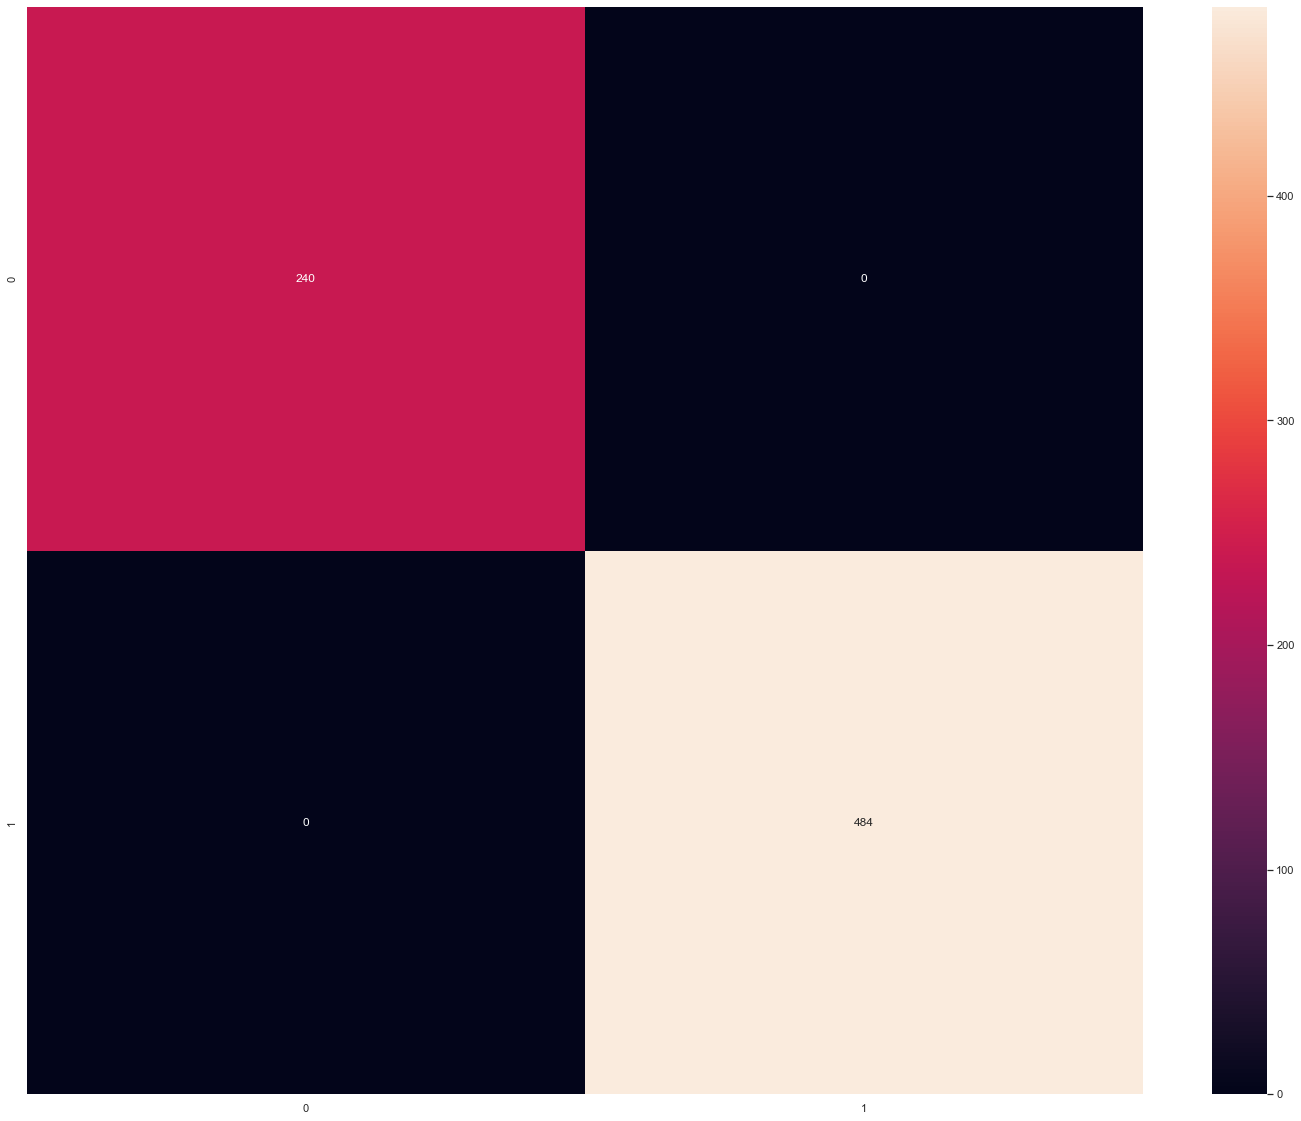

In [1036]:
##train
sns.heatmap(confusion_matrix(y_train, train_predictions), annot=True, fmt='g')
print(classification_report(y_train, train_predictions))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81       110
           1       0.92      0.93      0.92       273

    accuracy                           0.89       383
   macro avg       0.87      0.86      0.87       383
weighted avg       0.89      0.89      0.89       383



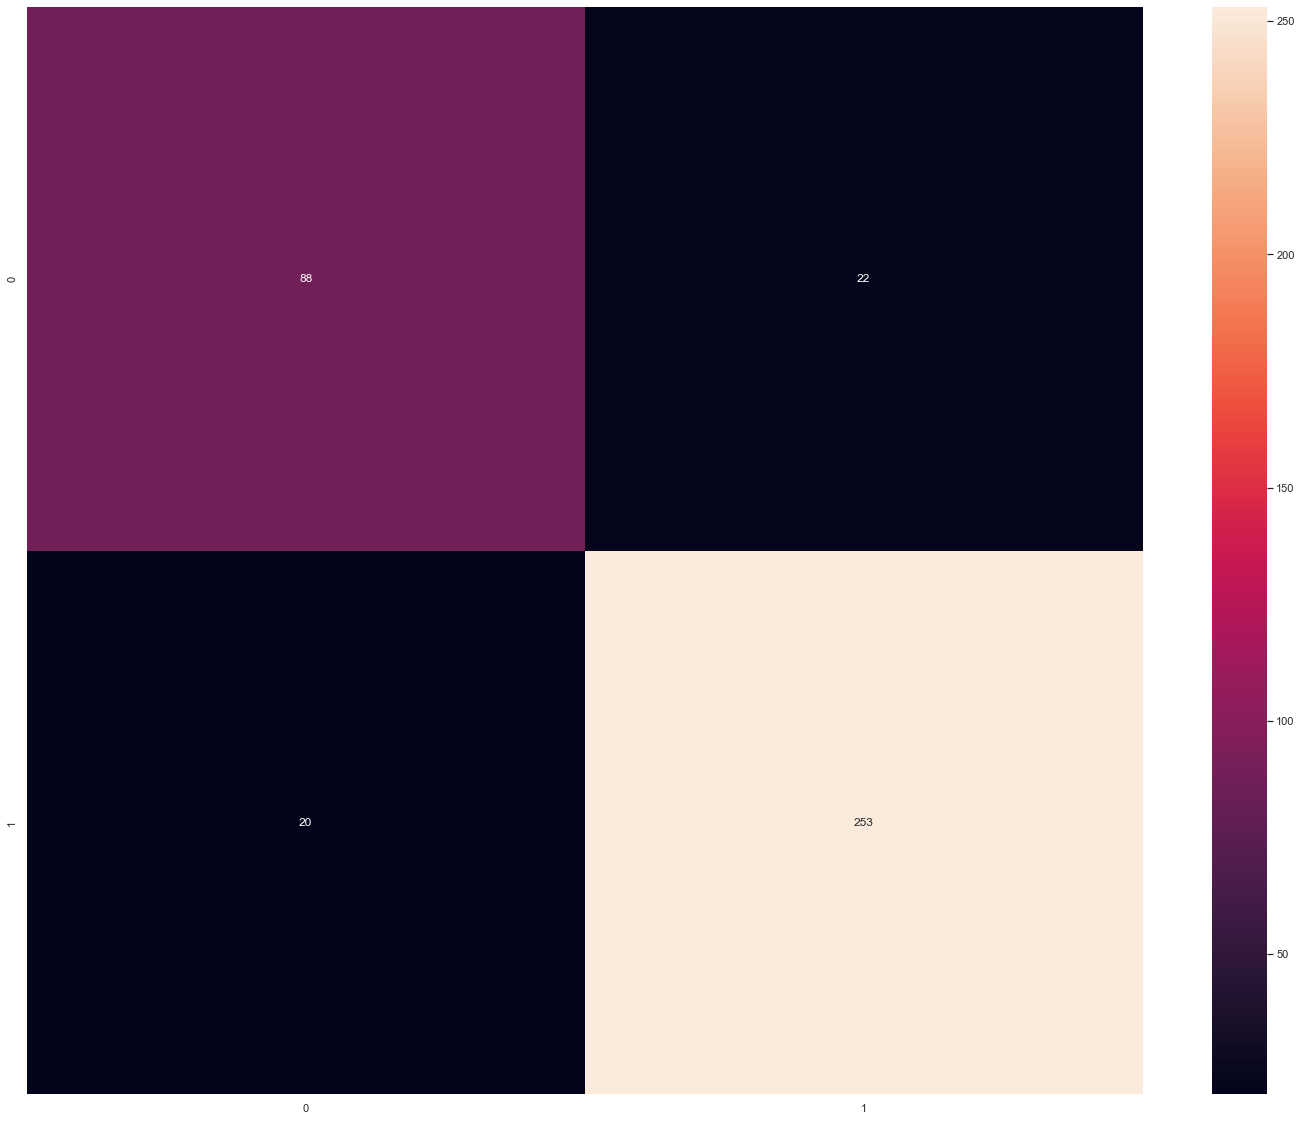

In [1037]:
##test
sns.heatmap(confusion_matrix(y_test, test_predictions), annot=True, fmt='g')
print(classification_report(y_test, test_predictions))

In [1043]:
##Shapelet
from sktime.classification.shapelet_based import ShapeletTransformClassifier
from sktime.classification.sklearn import RotationForest
from sktime.datasets import load_unit_test
#####
clf = ShapeletTransformClassifier(
    estimator=RotationForest(n_estimators=20),
    n_shapelet_samples=100,
    max_shapelets=10,
    batch_size=20,
)
####
clf.fit(X_train_nested, y_train)
###ShapeletTransformClassifier(...)
y_pred = clf.predict(X_test_nested)
clf.score(X_test_nested, y_test)

In [1045]:
train_predictions = clf.predict(X_train_nested)
accuracy_train = accuracy_score(y_train, train_predictions)
print(f"Accuracy train : %.2f%%" % (accuracy_train * 100.0))

Accuracy train : 100.00%


In [1046]:
###############################################################
test_predictions = clf.predict(X_test_nested)
accuracy_test = accuracy_score(y_test, test_predictions)
print(f"Accuracy test : %.2f%%" % (accuracy_test * 100.0))

Accuracy test : 84.86%


In [ ]:
### ojo faltan probar diferentes hiperparámetros 
